# Twitter NLTK Analysis

- quick summary on using tweets with chatgpt hashtag to pull most common words

In [2]:
# importing libraries and data
import pandas as pd
import numpy as np
import re
# from gensim.summarization import keywords
from nltk.probability import FreqDist

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt')  # required for tokenization
nltk.download('stopwords')  # required for removing stop words
nltk.download('averaged_perceptron_tagger') # including feelings

# df description
df = pd.read_csv('OG.csv')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\greyl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\greyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# filtering data for only english and limiting to 1000 tweets
df = df[df['Language']=='en']
df = df[0:10000]
print(df.describe())
print(df.corr())
cols = list(df.columns)

           Tweet Id    ReplyCount  RetweetCount     LikeCount    QuoteCount  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.617272e+18      1.545100      2.655700     19.989000      0.529700   
std    7.059010e+13     35.738093     82.885403    632.785359     21.784645   
min    1.617156e+18      0.000000      0.000000      0.000000      0.000000   
25%    1.617209e+18      0.000000      0.000000      0.000000      0.000000   
50%    1.617267e+18      0.000000      0.000000      0.000000      0.000000   
75%    1.617333e+18      1.000000      0.000000      2.000000      0.000000   
max    1.617399e+18   3098.000000   6815.000000  56073.000000   1947.000000   

       ConversationId  hastag_counts  
count    1.000000e+04   10000.000000  
mean     1.616870e+18       0.756000  
std      1.232311e+16       2.036192  
min      7.115537e+17       0.000000  
25%      1.617185e+18       0.000000  
50%      1.617240e+18       0.000000  
75%      1.6173

In [27]:
df['top1'] = np.full(len(df), np.nan)

df_text = df['Text'].sum()
df_text = df_text.lower()

# remove non-alphabetic characters
ignore_words = ['chatgpt', 'https', 'ai', 'co']
for w in ignore_words:
    df_text = df_text.replace(w, '')
non_alpha_regex = re.compile(r'[^a-zA-Z]') # define a regular expression to match non-alphabetic characters
df_text = non_alpha_regex.sub(' ', df_text)

# tokenize
tokens = word_tokenize(df_text)

# cleaning text to get stop words
stop_words = set(stopwords.words('english'))
cleaned_tokens = [token for token in tokens if token not in stop_words]



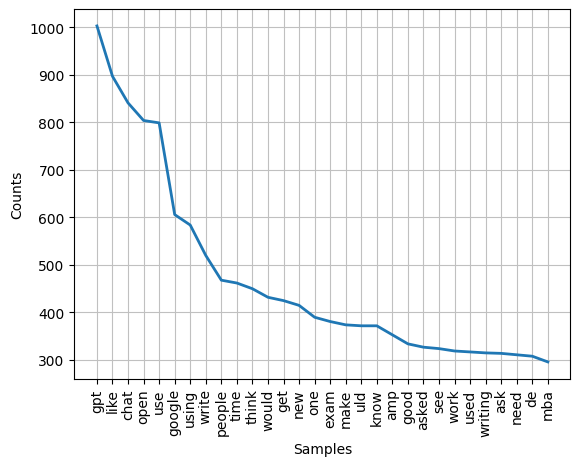

In [28]:
# plotting word frequency
fdist = FreqDist(cleaned_tokens)
fdist.plot(30, cumulative=False)
plt.show()

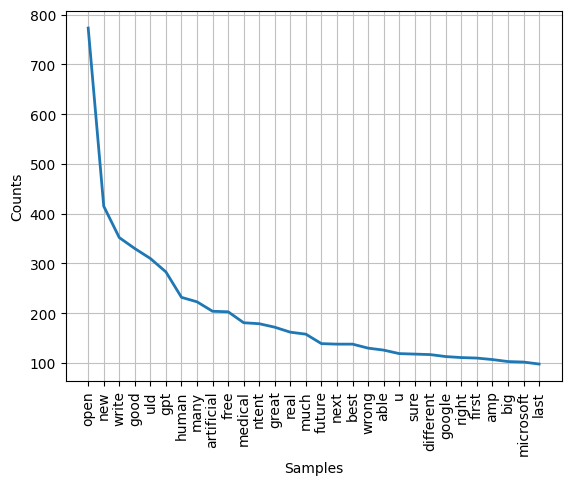

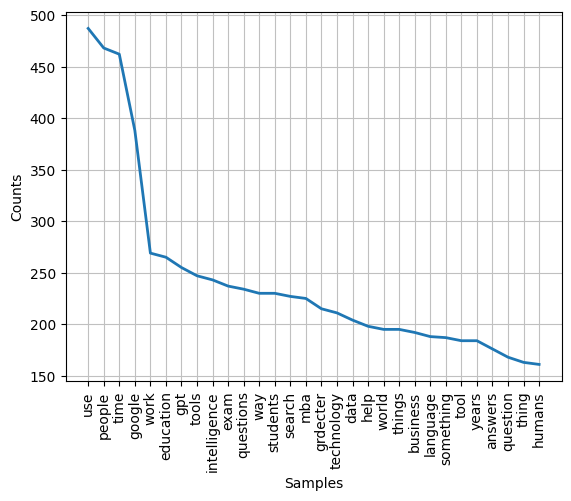

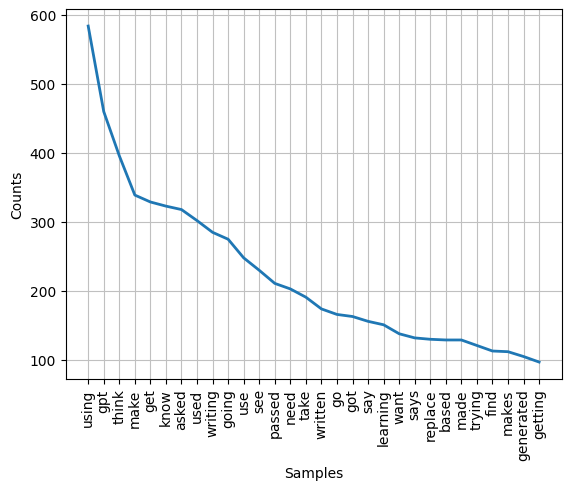

In [29]:
# tagging tokens and plotting Nouns, verbs, and adjectives
pos_tags = nltk.pos_tag(cleaned_tokens)
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

for wt in [adjectives, nouns, verbs]:
    dist = FreqDist(wt)
    dist.plot(30, cumulative=False)
    plt.show()